Enter the number of bedrooms:  1
Enter the number of bathrooms:  0.75
Enter the square footage of the living area:  820
Enter the square footage of the lot:  59677
Enter the number of floors:  1
Is there a waterfront (0 for No, 1 for Yes):  0
Enter the view rating (0-4):  0
Enter the condition rating (1-5):  3
Enter the square footage above ground:  820
Enter the square footage of the basement:  0
Enter the year built:  199
Enter the year renovated (0 if not renovated):  0


Predicted Price: $4,736,386.80


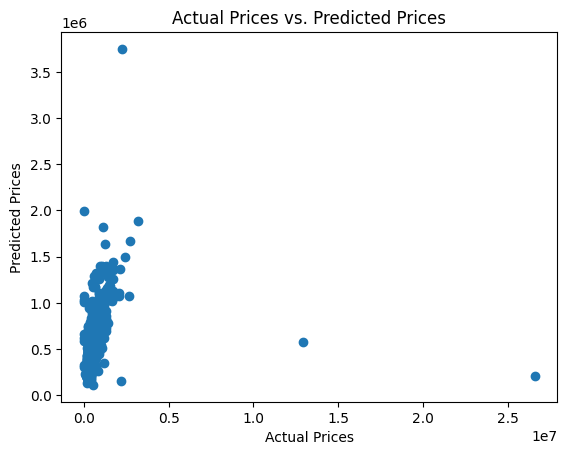

In [12]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#load the data
data = pd.read_csv("house_data_01.csv")

#set feature(x) and target(y)
X = data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
Y = data['price']

#split into train data and test data
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

#make linear regression model
model = LinearRegression()
#train model
model.fit(X_train,Y_train)
#make prediction on test data
y_pred = model.predict(X_test)


def get_user_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Please enter a valid number.")

#function for user input
user_input = pd.DataFrame({
    'bedrooms': [get_user_input("Enter the number of bedrooms: ")],
    'bathrooms': [get_user_input("Enter the number of bathrooms: ")],
    'sqft_living': [get_user_input("Enter the square footage of the living area: ")],
    'sqft_lot': [get_user_input("Enter the square footage of the lot: ")],
    'floors': [get_user_input("Enter the number of floors: ")],
    'waterfront': [get_user_input("Is there a waterfront (0 for No, 1 for Yes): ")],
    'view': [get_user_input("Enter the view rating (0-4): ")],
    'condition': [get_user_input("Enter the condition rating (1-5): ")],
    'sqft_above': [get_user_input("Enter the square footage above ground: ")],
    'sqft_basement': [get_user_input("Enter the square footage of the basement: ")],
    'yr_built': [get_user_input("Enter the year built: ")],
    'yr_renovated': [get_user_input("Enter the year renovated (0 if not renovated): ")],
})

user_input = user_input[X_train.columns]

# Make the prediction and print value
predicted_price = model.predict(user_input)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')

#plot graph of actual vs. predicted value
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()